<a href="https://colab.research.google.com/github/Manny-97/Hamoye-Internship/blob/main/Hamoye_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# I mporting the necessary Library
import numpy as np #For Mathematical computation
import pandas as pd #For Data Manipulation
import matplotlib.pyplot as plt #For Data Visualization
import seaborn as sns


In [2]:

url = 'https://raw.githubusercontent.com/Muhammadbravo/hamoye/main/ScrapedData/ElectricalVehicles/EVdataset.csv'
data = pd.read_csv(url, index_col=0)

In [3]:
data.head()

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl
vehicle name,,,,,,,,,
Mercedes,EQS 580 4MATIC,107.8,4.3 sec,210 km/h,177 Wh/km,800 km/h,"* £115,000","€135,529","* €140,000"
Tesla,Model 3 Standard Range Plus LFP,52.5,5.6 sec,225 km/h,150 Wh/km,560 km/h,"£40,990","€43,560","€49,990"
Tesla,Model Y Long Range Dual Motor,70.0,5.0 sec,217 km/h,171 Wh/km,520 km/h,"* £54,000","€59,965","€65,010"
Kia,EV6 GT,77.4,3.5 sec,260 km/h,196 Wh/km,920 km/h,"£58,295","€65,990","€63,595"
Tesla,Model 3 Long Range Dual Motor,70.0,4.4 sec,233 km/h,154 Wh/km,570 km/h,"£48,490",NaN,NaN


In [4]:
data.tail()

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl
vehicle name,,,,,,,,,
Toyota,PROACE Verso L 50 kWh,45.0,12.1 sec,130 km/h,250 Wh/km,240 km/h,NaN,"€59,385",NaN
Citroen,e-SpaceTourer XL 50 kWh,45.0,12.1 sec,130 km/h,257 Wh/km,230 km/h,NaN,"€52,230","€54,947"
Citroen,e-SpaceTourer XS 50 kWh,45.0,12.1 sec,130 km/h,243 Wh/km,250 km/h,NaN,"€50,880",NaN
Peugeot,e-Traveller Compact 50 kWh,45.0,12.1 sec,130 km/h,243 Wh/km,250 km/h,NaN,"€50,880",NaN
Opel,Zafira-e Life M 50 kWh,45.0,12.1 sec,130 km/h,250 Wh/km,240 km/h,NaN,"€53,800","€53,107"


In [5]:
data.sample(5)

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl
vehicle name,,,,,,,,,
Citroen,e-SpaceTourer M 75 kWh,65.0,13.3 sec,130 km/h,260 Wh/km,290 km/h,NaN,"€57,440","€62,026"
Opel,Zafira-e Life M 75 kWh,65.0,13.3 sec,130 km/h,260 Wh/km,290 km/h,NaN,"€59,800","€62,061"
Lexus,UX 300e,50.0,7.5 sec,160 km/h,192 Wh/km,150 km/h,"£43,900","€47,550","€39,990"
Peugeot,e-Rifter Long 50 kWh,45.0,11.7 sec,135 km/h,231 Wh/km,260 km/h,"£32,455","€42,590",NaN
Ford,Mustang Mach-E GT,88.0,4.4 sec,200 km/h,215 Wh/km,400 km/h,"* £67,225",NaN,"* €75,490"


In [6]:
data.columns

Index(['model', 'battery kWh', 'acceleration sec', 'top speeds km/h',
       'efficiency Wh/km', 'fast charge km/h', 'price uk', 'price ger',
       'price nl'],
      dtype='object')

In [7]:
data.isnull().sum()

model                0
battery kWh          0
acceleration sec     0
top speeds km/h      0
efficiency Wh/km     0
fast charge km/h     0
price uk            45
price ger           13
price nl            25
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, Mercedes to Opel
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             181 non-null    object 
 1   battery kWh       181 non-null    float64
 2   acceleration sec  181 non-null    object 
 3   top speeds km/h   181 non-null    object 
 4   efficiency Wh/km  181 non-null    object 
 5   fast charge km/h  181 non-null    object 
 6   price uk          136 non-null    object 
 7   price ger         168 non-null    object 
 8   price nl          156 non-null    object 
dtypes: float64(1), object(8)
memory usage: 14.1+ KB


In [9]:
data.describe()

,battery kWh
count,181.000000
mean,65.220994
std,24.861999
min,16.700000
25%,45.000000
50%,65.000000
75%,77.400000
max,200.000000


In [10]:
data.describe(include='object')

,model,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl
count,181,181,181,181,181,136,168,156
unique,175,77,35,81,71,128,153,144
top,e-tron Sportback 55 quattro,12.1 sec,160 km/h,168 Wh/km,290 km/h,"£79,900","* €50,000","€33,990"
freq,2,11,34,8,8,2,4,3


In [11]:
data['price uk'] = data['price uk'].replace({'\* ':'', '£':'', ',':''}, regex=True).astype(float)
data['price ger'] = data['price ger'].replace({'\* ':'', '€':'', ',':''}, regex=True).astype(float)
data['price nl'] = data['price nl'].replace({'\* ':'', '€':'', ',':''}, regex=True).astype(float)

In [12]:
data[['price uk']]

,price uk
vehicle name,
Mercedes,115000.0
Tesla,40990.0
Tesla,54000.0
Kia,58295.0
Tesla,48490.0
...,...
Toyota,NaN
Citroen,NaN
Citroen,NaN


In [13]:
# Cleaning the data by removing strings from each values and converting them to float
data['top speeds km/h'] = data['top speeds km/h'].replace({' km/h':''}, regex=True).astype(float)
data['fast charge km/h'] = data['fast charge km/h'].replace({'km/h':'', '-':'0'}, regex=True).astype(float)
data['efficiency Wh/km'] = data['efficiency Wh/km'].replace({' Wh/km':''}, regex=True).astype(float)
data['acceleration sec'] = data['acceleration sec'].replace({' sec':''}, regex=True).astype(float)

In [14]:
data.sample(10)

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl
vehicle name,,,,,,,,,
Lightyear,One,60.0,10.0,150.0,104.0,540.0,NaN,149000.0,149990.0
Peugeot,e-Traveller Long 50 kWh,45.0,13.1,130.0,243.0,250.0,49905.0,56690.0,NaN
Volkswagen,ID.4 Pro Performance,77.0,8.5,160.0,188.0,500.0,41570.0,44450.0,47790.0
Porsche,Taycan Turbo S Cross Turismo,83.7,2.9,250.0,220.0,790.0,139910.0,187746.0,193200.0
Fiat,500e Hatchback 24 kWh,23.8,9.5,135.0,144.0,260.0,20495.0,23560.0,24900.0
Honda,e Advance,28.5,8.3,145.0,168.0,190.0,30160.0,38000.0,39080.0
Nissan,Leaf,37.0,7.9,144.0,164.0,230.0,25995.0,29990.0,34990.0
Hyundai,IONIQ Electric,38.3,9.7,165.0,153.0,220.0,30550.0,35350.0,37015.0
Peugeot,e-Traveller Compact 50 kWh,45.0,12.1,130.0,243.0,250.0,NaN,50880.0,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, Mercedes to Opel
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             181 non-null    object 
 1   battery kWh       181 non-null    float64
 2   acceleration sec  181 non-null    float64
 3   top speeds km/h   181 non-null    float64
 4   efficiency Wh/km  181 non-null    float64
 5   fast charge km/h  181 non-null    float64
 6   price uk          136 non-null    float64
 7   price ger         168 non-null    float64
 8   price nl          156 non-null    float64
dtypes: float64(8), object(1)
memory usage: 14.1+ KB


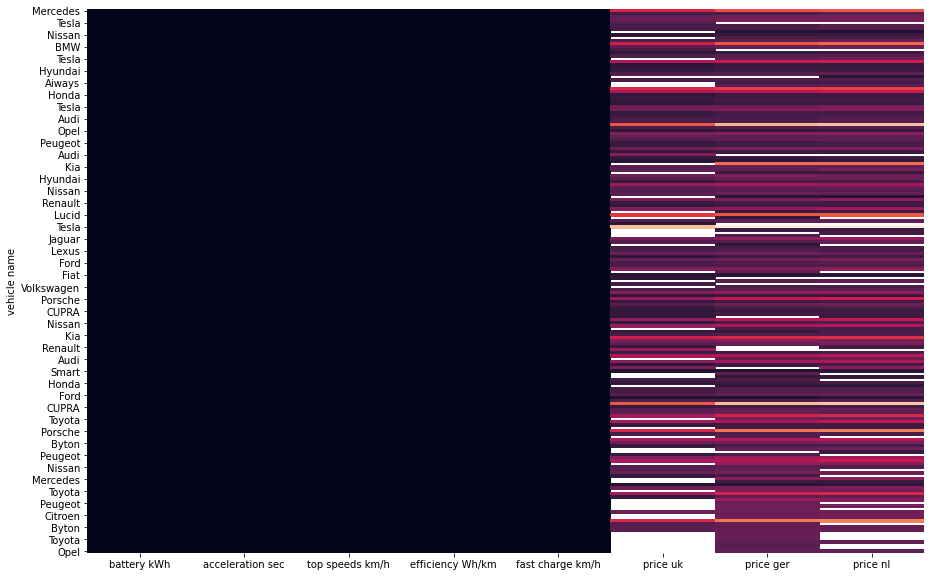

In [16]:
plt.figure(figsize=(15,10))
#  visualization that highlight where the missing values occur in the dataset
sns.heatmap(data.drop('model', axis=1), cbar=False)

In [17]:
# Converting the original data index to a feature
data['vehicle name'] = data.index

In [18]:
data.head()

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl,vehicle name
vehicle name,,,,,,,,,,
Mercedes,EQS 580 4MATIC,107.8,4.3,210.0,177.0,800.0,115000.0,135529.0,140000.0,Mercedes
Tesla,Model 3 Standard Range Plus LFP,52.5,5.6,225.0,150.0,560.0,40990.0,43560.0,49990.0,Tesla
Tesla,Model Y Long Range Dual Motor,70.0,5.0,217.0,171.0,520.0,54000.0,59965.0,65010.0,Tesla
Kia,EV6 GT,77.4,3.5,260.0,196.0,920.0,58295.0,65990.0,63595.0,Kia
Tesla,Model 3 Long Range Dual Motor,70.0,4.4,233.0,154.0,570.0,48490.0,NaN,NaN,Tesla


In [19]:
# Assigning numerical index to the dataset
ans = []
for i in range(len(data)):
  ans.append(i)

data.index = ans

In [20]:
data.head(10)

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl,vehicle name
0,EQS 580 4MATIC,107.8,4.3,210.0,177.0,800.0,115000.0,135529.0,140000.0,Mercedes
1,Model 3 Standard Range Plus LFP,52.5,5.6,225.0,150.0,560.0,40990.0,43560.0,49990.0,Tesla
2,Model Y Long Range Dual Motor,70.0,5.0,217.0,171.0,520.0,54000.0,59965.0,65010.0,Tesla
3,EV6 GT,77.4,3.5,260.0,196.0,920.0,58295.0,65990.0,63595.0,Kia
4,Model 3 Long Range Dual Motor,70.0,4.4,233.0,154.0,570.0,48490.0,NaN,NaN,Tesla
5,Model 3 Standard Range Plus,51.0,5.6,225.0,146.0,700.0,40990.0,43560.0,49990.0,Tesla
6,Enyaq iV 80,77.0,8.6,160.0,183.0,510.0,39365.0,43950.0,47780.0,Skoda
7,Spring Electric,26.8,15.0,125.0,158.0,120.0,NaN,20490.0,17890.0,Dacia
8,Leaf,37.0,7.9,144.0,164.0,230.0,25995.0,29990.0,34990.0,Nissan
9,Kona Electric 64 kWh,64.0,7.9,167.0,162.0,370.0,NaN,41850.0,41595.0,Hyundai


In [21]:
# Checking for the value count of each unique vehicle name
pd.DataFrame(data['vehicle name'].value_counts())

,vehicle name
Audi,17
Tesla,15
Volkswagen,11
Porsche,10
Hyundai,10
Mercedes,9
Peugeot,9
Kia,9
Opel,8
Nissan,8


In [22]:
# Checking for the location of missing values for the price in Germany
data[data['price ger'].isnull()]

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl,vehicle name
4,Model 3 Long Range Dual Motor,70.0,4.4,233.0,154.0,570.0,48490.0,NaN,NaN,Tesla
13,ID.4 1st,77.0,8.5,160.0,188.0,500.0,40800.0,NaN,NaN,Volkswagen
22,e-Up!,32.3,11.9,130.0,158.0,170.0,NaN,NaN,25850.0,Volkswagen
48,e-tron 55 quattro,86.5,5.7,200.0,237.0,590.0,71500.0,NaN,NaN,Audi
71,MG5 EV,48.8,7.7,185.0,165.0,340.0,25095.0,NaN,NaN,MG
74,3,52.0,8.9,155.0,193.0,390.0,NaN,NaN,37995.0,Seres
89,MG5 EV Long Range,57.0,7.7,185.0,168.0,340.0,26495.0,NaN,NaN,MG
91,e-Soul 64 kWh,64.0,7.9,167.0,173.0,350.0,37545.0,NaN,NaN,Kia
102,ID.3 Pure Performance,45.0,8.9,160.0,164.0,260.0,27135.0,NaN,33490.0,Volkswagen
112,Kangoo Maxi ZE 33,31.0,22.4,130.0,194.0,0.0,31680.0,NaN,38801.0,Renault


In [23]:
# Creating a new dataframe by dropping NaN values in the dataset
new_data = data.dropna(axis=0)
new_data.isnull().sum()

model               0
battery kWh         0
acceleration sec    0
top speeds km/h     0
efficiency Wh/km    0
fast charge km/h    0
price uk            0
price ger           0
price nl            0
vehicle name        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

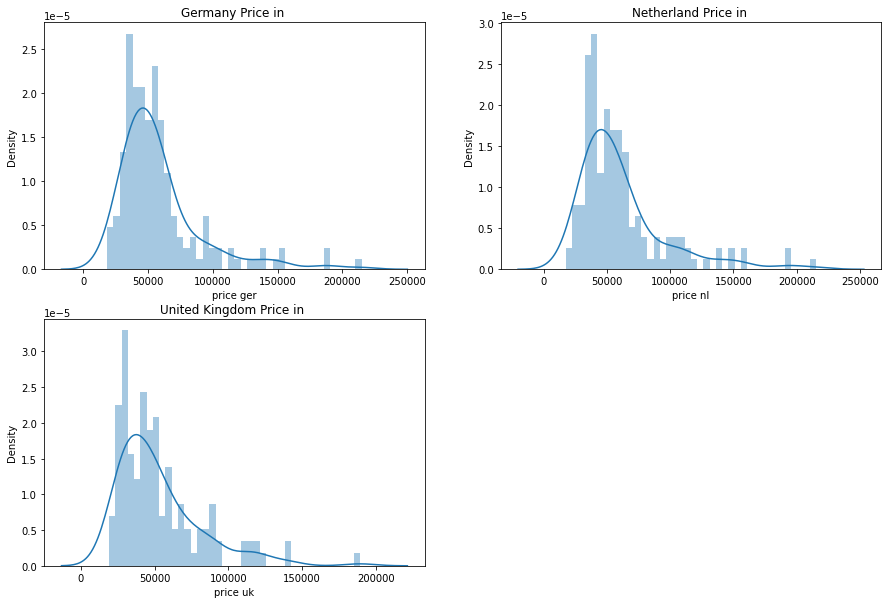

In [24]:
# Showing a visualization i.e. Distribution plot for the price in different countries
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(data['price ger'], bins=40)
plt.title('Germany Price in ')

plt.subplot(2,2,2)
sns.distplot(data['price nl'], bins=40)
plt.title('Netherland Price in ')

plt.subplot(2,2,3)
sns.distplot(data['price uk'], bins=40)
plt.title('United Kingdom Price in ')
plt.show()

In [25]:
ax = data.groupby('battery kWh')['price ger', 'price nl', 'price uk'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


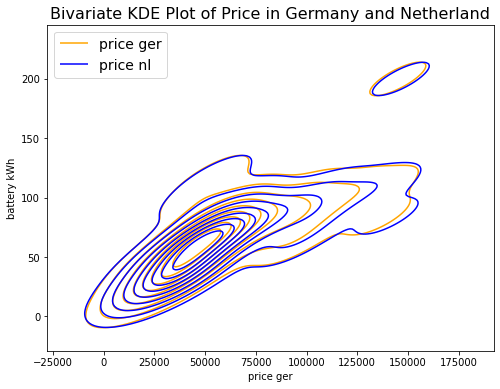

In [26]:
plt.figure(figsize=(8,6))
sns.kdeplot(ax['price ger'], ax.index, color='orange', label='price ger')
sns.kdeplot(ax['price nl'], ax.index, color='blue', label='price nl')
plt.legend(loc='upper left', fontsize=14)
plt.title('Bivariate KDE Plot of Price in Germany and Netherland', fontsize=16)
plt.show()

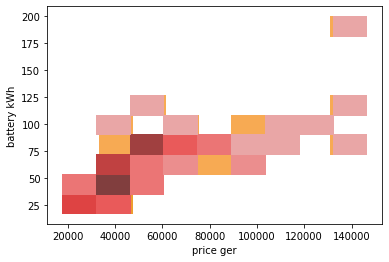

In [27]:
sns.histplot(data=ax, x=ax['price ger'], y=ax.index, color='orange')
sns.histplot(data=ax, x=ax['price nl'], y=ax.index, color='brown')

In [28]:
missing_index =[]
data[data['price nl'].isnull()].index

Int64Index([  4,  13,  48,  69,  71,  75,  78,  87,  89,  91, 113, 121, 123,
            142, 148, 153, 155, 164, 166, 171, 174, 175, 176, 178, 179],
           dtype='int64')

In [29]:
# A function to fill the missing values of price in Germany by those in Netherland
def fill_nan(df):
  if np.isnan(df['price ger']):
    return df['price nl']
  else:
    return df['price ger']

data['price ger'] = data.apply(lambda df: fill_nan(df), axis=1)

In [30]:
# Count of missing values in Germany
data['price ger'].isnull().sum()

7

In [31]:
# A function that fills the missing values of price in Netherland with those in Germany
def fill_nan(df):
  if np.isnan(df['price nl']):
    return df['price ger']
  else:
    return df['price nl']

data['price nl'] = data.apply(lambda df: fill_nan(df), axis=1)

In [32]:
# Counting the missing values in Netherland
data['price nl'].isnull().sum()

7

In [33]:
data[data['price ger'].isnull()]

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl,vehicle name
4,Model 3 Long Range Dual Motor,70.0,4.4,233.0,154.0,570.0,48490.0,NaN,NaN,Tesla
13,ID.4 1st,77.0,8.5,160.0,188.0,500.0,40800.0,NaN,NaN,Volkswagen
48,e-tron 55 quattro,86.5,5.7,200.0,237.0,590.0,71500.0,NaN,NaN,Audi
71,MG5 EV,48.8,7.7,185.0,165.0,340.0,25095.0,NaN,NaN,MG
89,MG5 EV Long Range,57.0,7.7,185.0,168.0,340.0,26495.0,NaN,NaN,MG
91,e-Soul 64 kWh,64.0,7.9,167.0,173.0,350.0,37545.0,NaN,NaN,Kia
113,e-tron Sportback 55 quattro,86.5,5.7,200.0,231.0,600.0,79900.0,NaN,NaN,Audi


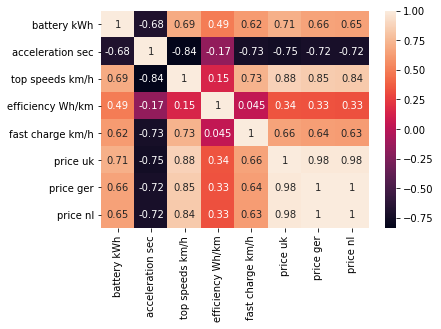

In [34]:
# Generating a heatmap to see how each variables correlate with one another
sns.heatmap(new_data.corr(), annot=True)

In [35]:
# Now let's convert all currency to the Euros

In [36]:
data['price uk'] = data['price uk']*1.17

In [37]:
data['price ger'] = data['price ger']
data['price nl'] = data['price nl']

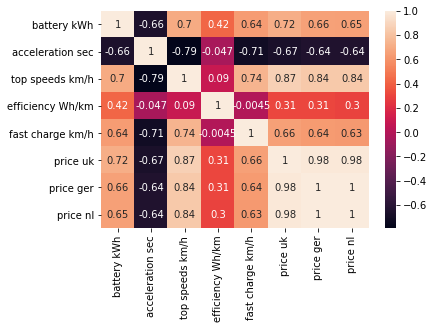

In [38]:
sns.heatmap(data.dropna(axis=0).corr(), annot=True)

In [39]:
data.head(10)

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl,vehicle name
0,EQS 580 4MATIC,107.8,4.3,210.0,177.0,800.0,134550.00,135529.0,140000.0,Mercedes
1,Model 3 Standard Range Plus LFP,52.5,5.6,225.0,150.0,560.0,47958.30,43560.0,49990.0,Tesla
2,Model Y Long Range Dual Motor,70.0,5.0,217.0,171.0,520.0,63180.00,59965.0,65010.0,Tesla
3,EV6 GT,77.4,3.5,260.0,196.0,920.0,68205.15,65990.0,63595.0,Kia
4,Model 3 Long Range Dual Motor,70.0,4.4,233.0,154.0,570.0,56733.30,NaN,NaN,Tesla
5,Model 3 Standard Range Plus,51.0,5.6,225.0,146.0,700.0,47958.30,43560.0,49990.0,Tesla
6,Enyaq iV 80,77.0,8.6,160.0,183.0,510.0,46057.05,43950.0,47780.0,Skoda
7,Spring Electric,26.8,15.0,125.0,158.0,120.0,NaN,20490.0,17890.0,Dacia
8,Leaf,37.0,7.9,144.0,164.0,230.0,30414.15,29990.0,34990.0,Nissan
9,Kona Electric 64 kWh,64.0,7.9,167.0,162.0,370.0,NaN,41850.0,41595.0,Hyundai


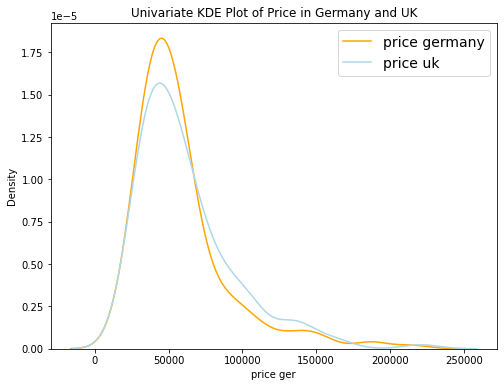

In [40]:
plt.figure(figsize=(8,6))
sns.kdeplot(data['price ger'], color='orange', label='price germany')
sns.kdeplot(data['price uk'], color='lightblue', label='price uk')
plt.title('Univariate KDE Plot of Price in Germany and UK')
plt.legend(loc='upper right', fontsize=14)
plt.show()

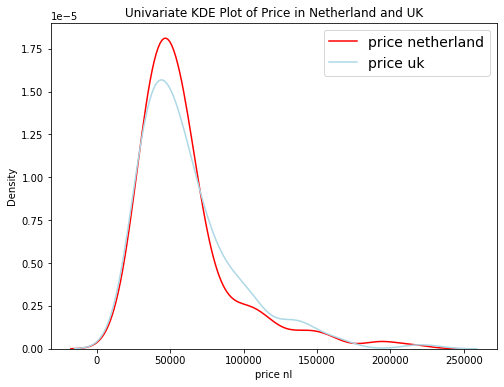

In [41]:
plt.figure(figsize=(8,6))
sns.kdeplot(data['price nl'], color='red', label='price netherland')
sns.kdeplot(data['price uk'], color='lightblue', label='price uk')
plt.title('Univariate KDE Plot of Price in Netherland and UK')
plt.legend(loc='upper right', fontsize=14)
plt.show()

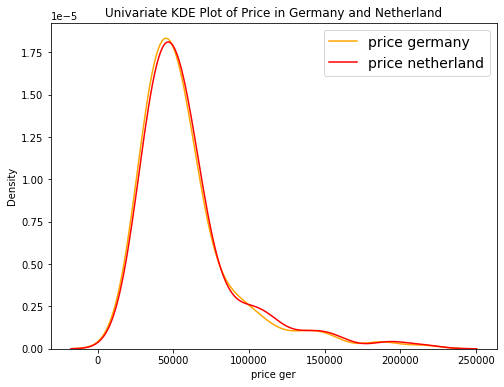

In [42]:
plt.figure(figsize=(8,6))
sns.kdeplot(data['price ger'], color='orange', label='price germany')
sns.kdeplot(data['price nl'], color='red', label='price netherland')
plt.title('Univariate KDE Plot of Price in Germany and Netherland')
plt.legend(loc='upper right', fontsize=14)
plt.show()

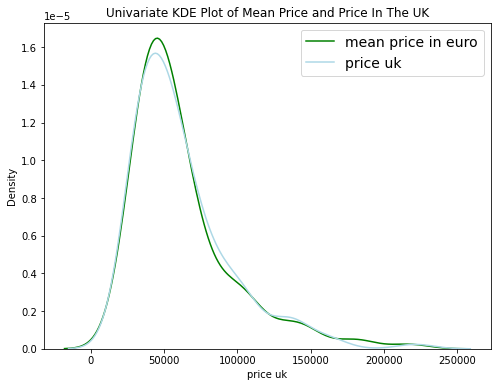

In [43]:
plt.figure(figsize=(8,6))
sns.kdeplot((data['price ger']+data['price nl'] + data['price uk'])/3, color='green', label='mean price in euro')
sns.kdeplot(data['price uk'], color='lightblue', label='price uk')
plt.title('Univariate KDE Plot of Mean Price and Price In The UK')
plt.legend(loc='upper right', fontsize=14)
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [45]:
test = data[data.isnull()]

In [46]:
test = data[data['price nl'].isnull()]

In [47]:
test.head()

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price uk,price ger,price nl,vehicle name
4,Model 3 Long Range Dual Motor,70.0,4.4,233.0,154.0,570.0,56733.30,NaN,NaN,Tesla
13,ID.4 1st,77.0,8.5,160.0,188.0,500.0,47736.00,NaN,NaN,Volkswagen
48,e-tron 55 quattro,86.5,5.7,200.0,237.0,590.0,83655.00,NaN,NaN,Audi
71,MG5 EV,48.8,7.7,185.0,165.0,340.0,29361.15,NaN,NaN,MG
89,MG5 EV Long Range,57.0,7.7,185.0,168.0,340.0,30999.15,NaN,NaN,MG


In [48]:
train = data.drop(['price uk', 'price nl'], axis=1)
train = train.dropna(axis=0)
train.head()

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price ger,vehicle name
0,EQS 580 4MATIC,107.8,4.3,210.0,177.0,800.0,135529.0,Mercedes
1,Model 3 Standard Range Plus LFP,52.5,5.6,225.0,150.0,560.0,43560.0,Tesla
2,Model Y Long Range Dual Motor,70.0,5.0,217.0,171.0,520.0,59965.0,Tesla
3,EV6 GT,77.4,3.5,260.0,196.0,920.0,65990.0,Kia
5,Model 3 Standard Range Plus,51.0,5.6,225.0,146.0,700.0,43560.0,Tesla


In [49]:
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler()
encoder = LabelEncoder()
#train = train.drop('model', axis=1)
train['vehicle name'] = encoder.fit_transform(train['vehicle name'])
train.head()

,model,battery kWh,acceleration sec,top speeds km/h,efficiency Wh/km,fast charge km/h,price ger,vehicle name
0,EQS 580 4MATIC,107.8,4.3,210.0,177.0,800.0,135529.0,20
1,Model 3 Standard Range Plus LFP,52.5,5.6,225.0,150.0,560.0,43560.0,33
2,Model Y Long Range Dual Motor,70.0,5.0,217.0,171.0,520.0,59965.0,33
3,EV6 GT,77.4,3.5,260.0,196.0,920.0,65990.0,14
5,Model 3 Standard Range Plus,51.0,5.6,225.0,146.0,700.0,43560.0,33


In [50]:
train.columns

Index(['model', 'battery kWh', 'acceleration sec', 'top speeds km/h',
       'efficiency Wh/km', 'fast charge km/h', 'price ger', 'vehicle name'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = train.drop(['price ger', 'model'], axis=1)
y = train['price ger']
Random_state = 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=Random_state)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [54]:
#models = [LinearRegression(), Ridge(), Lasso(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor()]
#names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Multilayer Perceptron']
# Define a function that trains a model and computes error metrics
#for name, model in zip(names, models):
model = DecisionTreeRegressor(random_state=Random_state)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The mean squared error is ', mean_squared_error(y_test, prediction))
print('\n')
print('The mean absolute error is ', mean_absolute_error(y_test, prediction))
print('\n')
print('The R2_Score is ', r2_score(y_test, prediction))
print('\n')
print('Decision Tree Algorithm')
print('\n')

The mean squared error is  368274891.9714286


The mean absolute error is  10456.942857142858


The R2_Score is  0.57173779722743


Decision Tree Algorithm




In [55]:
model = Ridge()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The mean squared error is ', mean_squared_error(y_test, prediction))
print('\n')
print('The mean absolute error is ', mean_absolute_error(y_test, prediction))
print('\n')
print('The R2_Score is ', r2_score(y_test, prediction))
print('\n')
print('Ridge Regression Algorithm')
print('\n')

The mean squared error is  351851933.6968439


The mean absolute error is  10738.7382743174


The R2_Score is  0.5908358471896884


Ridge Regression Algorithm




In [56]:
model = Lasso()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The mean squared error is ', mean_squared_error(y_test, prediction))
print('\n')
print('The mean absolute error is ', mean_absolute_error(y_test, prediction))
print('\n')
print('The R2_Score is ', r2_score(y_test, prediction))
print('\n')
print('Lasso Regression Algorithm')
print('\n')

The mean squared error is  351873508.6536771


The mean absolute error is  10738.282590849782


The R2_Score is  0.590810757945921


Lasso Regression Algorithm




In [57]:
model = RandomForestRegressor(random_state=Random_state)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The mean squared error is ', mean_squared_error(y_test, prediction))
print('\n')
print('The mean absolute error is ', mean_absolute_error(y_test, prediction))
print('\n')
print('The R2_Score is ', r2_score(y_test, prediction))
print('\n')
print('Random Forest Algorithm')
print('\n')

The mean squared error is  275365650.4484028


The mean absolute error is  8283.839132653064


The R2_Score is  0.6797807762629562


Random Forest Algorithm




In [58]:
model = SVR()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The mean squared error is ', mean_squared_error(y_test, prediction))
print('\n')
print('The mean absolute error is ', mean_absolute_error(y_test, prediction))
print('\n')
print('The R2_Score is ', r2_score(y_test, prediction))
print('\n')
print('Support Vector Machines Algorithm')
print('\n')

The mean squared error is  865088750.5113481


The mean absolute error is  18467.064336861917


The R2_Score is  -0.006000740111555158


Support Vector Machines Algorithm




In [59]:
model = GradientBoostingRegressor(random_state=Random_state)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The mean squared error is ', mean_squared_error(y_test, prediction))
print('\n')
print('The mean absolute error is ', mean_absolute_error(y_test, prediction))
print('\n')
print('The R2_Score is ', r2_score(y_test, prediction))
print('\n')
print('Gradient Boost Algorithm')
print('\n')

The mean squared error is  264274776.8332961


The mean absolute error is  7154.622374393255


The R2_Score is  0.6926782125764974


Gradient Boost Algorithm




In [60]:
model = MLPRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The mean squared error is ', mean_squared_error(y_test, prediction))
print('\n')
print('The mean absolute error is ', mean_absolute_error(y_test, prediction))
print('\n')
print('The R2_Score is ', r2_score(y_test, prediction))
print('\n')
print('MLP Algorithm')
print('\n')

The mean squared error is  3157509030.329736


The mean absolute error is  48450.76820076246


The R2_Score is  -2.6718272195113526


MLP Algorithm




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The mean squared error is ', mean_squared_error(y_test, prediction))
print('\n')
print('The mean absolute error is ', mean_absolute_error(y_test, prediction))
print('\n')
print('The R2_Score is ', r2_score(y_test, prediction))
print('\n')
print('Linear Regression Algorithm')
print('\n')

The mean squared error is  351875720.087826


The mean absolute error is  10738.285794656495


The R2_Score is  0.5908081862971863


Linear Regression Algorithm




### Now, we move to Hyperparameter tuning using Gridsearch

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {'n_estimators':[300, 500, 750,100], }

In [64]:
clf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, cv=5, scoring='r2')

In [65]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [66]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [67]:
clf.best_params_

{'n_estimators': 750}

In [68]:
print(clf.best_params_)

{'n_estimators': 750}


In [69]:
print(clf.best_score_)

0.7515470435516111


In [70]:
from xgboost import XGBRegressor
XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [71]:
param1 = {'n_estimators':[300, 500, 750, 100], 'max_depth':[2,3,5,7], 'max_leaf_nodes':[2, 5], 'min_samples_leaf':[1, 2, 3], 
          'min_samples_split':[2,3,4]}

# For Xgboost, we have:
# gbtree - for tree models, and gblinear - for linear model
# Parameters for controlling speed: n_estimators, colsample_bytree, and subsample
# Parameters for reducing overfitting: learning_rate, max_depth, and min_child_weight
param2 = {'colsample_bytree':[0.2, 0.5, 0.7], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[100,300,500,750,1000],
          'min_child_weight':[1,3,5], 'max_depth':[3,5,7,10]}

In [72]:
# Now we perform GridSearchCV on Random Forest Algorithm
clf_rfr = GridSearchCV(estimator=RandomForestRegressor(random_state=Random_state), param_grid=param1, cv=5, scoring='r2', n_jobs=-1)

In [73]:
clf_rfr.fit(X_train, y_train)
print(clf_rfr.best_params_)
print('\n')
print(clf_rfr.best_score_)

{'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


0.6624698091230944


In [74]:
# Now we Perform GridSearchCV on Xgboost Algorithm
clf_xgb = GridSearchCV(estimator=XGBRegressor(random_state=Random_state), param_grid=param2, cv=5, scoring='r2', n_jobs=-1)

In [75]:
clf_xgb.fit(X_train, y_train)
print(clf_xgb.best_params_)
print('\n')
print(clf_xgb.best_score_)

[08:39:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 750}


0.7664290013757664
